In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [157]:
ds=pd.read_csv('BMI_Data.csv')
ds.head()

,Gender,Height(cm),Weight(Kg),Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [158]:
unique=(-2,0,1,2,3,4,5)
health=['Malnourished','Underweight','Fit','Slightly Overweight','Overweight','Extremely Overweight']
ds['Index']=pd.cut(ds['Index'],bins=unique,labels=health)

In [176]:
X=ds.drop('Index',axis=1)
y=ds['Index']

In [177]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
X['Gender']=encode.fit_transform(X['Gender'])

In [178]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(X)

In [180]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [196]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [197]:
pred=classifier.predict(X_test)

In [199]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,pred)
print('Accuracy = ',accuracy)

Accuracy =  0.9


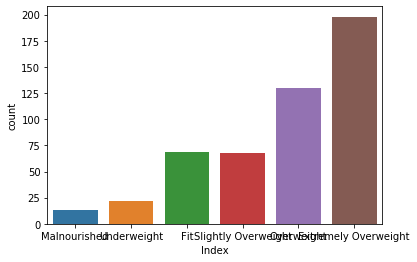

In [205]:
sb.countplot(ds['Index'])

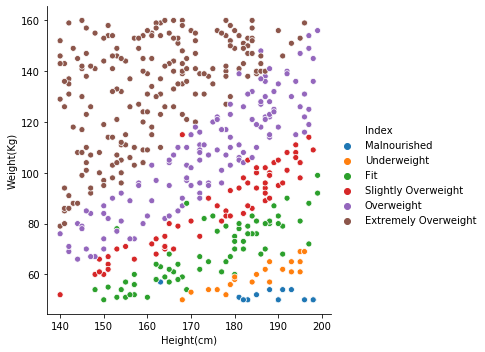

In [206]:
sb.relplot(data=ds,x='Height(cm)',y='Weight(Kg)',hue='Index')